In [1]:
import graph_handler 
import metaheuristics as mh
import matplotlib.pyplot as plt

import pickle
import numpy as np
import math
from scipy.stats import wilcoxon

In [2]:
PRESSURE = {1:[],2:[],5:[],10:[],50:[]}

def compareByFmPasses(passes = 1, numberOfRuns = 20, dic = PRESSURE):

    graphInit = graph_handler.parse_graph("res/Graph500.txt", False)
    for k,lis in dic.items():
        for i in range(numberOfRuns):
            res,_,_, genCuts = mh.pressureGeneticSearch(graphInit.copy(),  population=50, maxFmPass=passes, selection_pressure=k )
            lis.append(res)
        dic.update({k:lis})
    pickle.dump(dic, open(f'res/results/genetic_pressure_dic.p', "wb"))
    return dic

#geneticCuts = compareByFmPasses(passes = 2000, numberOfRuns= 20)

#print(graph_handler.getStringBinaryRepresentation(graphInit))


In [3]:
genDic = pickle.load(open("res/results/genetic_pressure_dic.p", "rb"))

In [4]:
print(len(genDic[1]))

20


In [5]:
avg_gen_dic = {}
for k_pressure, results in genDic.items():
    avg_cut = []
    avg_fittness = []
    longest_run = min(len(x) for x in results)
    for i in range(0,longest_run):
        cutSum = 0
        avgSum = 0
        contributors = 0
        for j in range(0,len(results)):
            if(i<len(results[j])):
                cutSum+=results[j][i][0]
                avgSum+=results[j][i][1]
                contributors+=1
            else:
                continue
        avg_min_cut = cutSum/contributors
        avg_pop_avg = avgSum/contributors
        avg_cut.append(avg_min_cut)
        avg_fittness.append(avg_pop_avg)
    avg_gen_dic.update({k_pressure:{"cuts":avg_cut,"avg":avg_fittness}})

print(avg_gen_dic)

{1: {'cuts': [36.85, 32.4, 31.25, 28.3, 25.8, 23.45, 23.45, 23.45, 23.3, 21.9, 21.65, 21.1, 21.1, 21.1, 20.25, 19.15, 18.9, 18.55, 18.45, 18.45, 18.45, 18.3, 18.05, 17.85, 17.85, 17.8, 17.8, 17.55, 17.55, 17.35, 17.35, 17.35, 17.35, 17.15, 16.95, 16.95, 16.95, 16.9, 16.7, 16.7, 16.7, 16.55, 16.55, 16.55, 16.55, 16.55, 16.55, 16.1, 15.5, 15.1, 15.1, 15.1, 15.05, 15.05, 14.95, 14.95, 14.6, 14.4, 14.4, 14.4, 14.4, 14.4, 14.2, 14.2, 14.2, 14.2, 14.2, 14.2, 14.2, 14.2, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 13.8, 13.8, 13.8, 13.8, 13.4, 13.4, 13.4, 13.05, 13.05, 13.05, 13.0, 13.0, 13.0, 13.0, 13.0, 12.95, 12.95, 12.95, 12.95, 12.8, 12.8, 12.8, 12.8, 12.8, 12.5, 12.5, 12.5, 12.25, 12.25, 12.25, 12.25, 12.25, 12.25, 12.1, 12.1, 11.85, 11.85, 11.85, 11.85, 11.85, 11.85, 11.85, 11.85, 11.85, 11.85, 11.85, 11.85, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.55, 11.55, 11.55, 11.55, 11.55, 11.55, 11.55, 11.55, 11.55, 11.55

hi


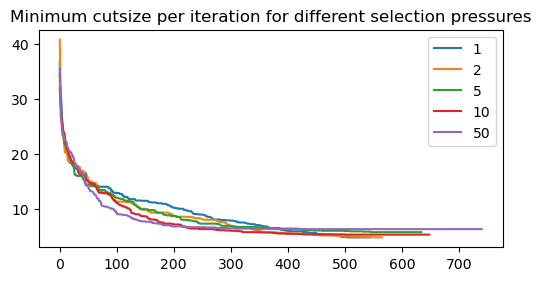

In [6]:
#Plot minimum cutsize per iteration
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(avg_gen_dic[1]['cuts'], label='1')  # Plot some data on the axes.
ax.plot(avg_gen_dic[2]['cuts'], label='2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[5]['cuts'], label='5')  # Plot some data on the axes.
ax.plot(avg_gen_dic[10]['cuts'], label='10')  # Plot some data on the axes.
ax.plot(avg_gen_dic[50]['cuts'], label='50')  # Plot some data on the axes.
ax.legend()  # Add a legend.
ax.set_title("Minimum cutsize per iteration for different selection pressures")  # Add a legend.

print("hi")

Text(0.5, 1.0, 'Average cutsize per iteration for different selection pressures')

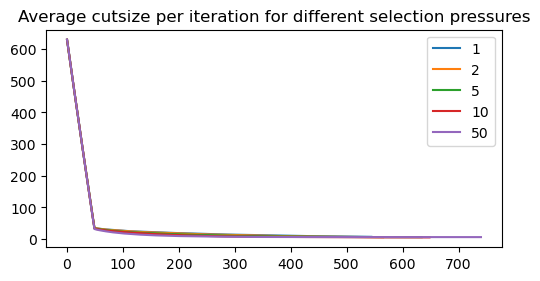

In [7]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(avg_gen_dic[1]['avg'], label='1')  # Plot some data on the axes.
ax.plot(avg_gen_dic[2]['avg'], label='2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[5]['avg'], label='5')  # Plot some data on the axes.
ax.plot(avg_gen_dic[10]['avg'], label='10')  # Plot some data on the axes.
ax.plot(avg_gen_dic[50]['avg'], label='50')  # Plot some data on the axes.
ax.legend()  # Add a legend.
ax.set_title("Average cutsize per iteration for different selection pressures")  # Add a legend.


<h2>GLS+ILS</h2>

In [37]:
PRESSURE = {(1,2):[],(1,4):[],(2,2):[],(2,4):[],(5,2):[],(5,4):[],(10,2):[],(10,4):[]}

def compareByFmPasses(passes=10000,numberOfRuns = 20, dic = PRESSURE):
    graphInit = graph_handler.parse_graph("res/Graph500.txt", False)
    for (k,m),lis in dic.items():
        for i in range(numberOfRuns):
            res,_,_, genCuts = mh.ilsGeneticSearch(graphInit.copy(),  population=50, maxFmPass=passes, selectionPressure=k, startNumberOfMutations=m)
            lis.append(res)
        dic.update({(k,m):lis})
    pickle.dump(dic, open(f'res/results/ils_genetic_pressure_dic.p', "wb"))
    return dic

geneticCuts = compareByFmPasses(numberOfRuns= 20,passes=2000)
print(geneticCuts)
#print(graph_handler.getStringBinaryRepresentation(graphInit))

{(1, 2): [[[28, 630.7, 6], [28, 617.68, 11], [28, 605.12, 15], [28, 592.5, 20], [28, 579.72, 24], [28, 567.1, 28], [28, 554.6, 32], [28, 542.06, 37], [28, 529.76, 40], [28, 517.44, 44], [28, 505.34, 48], [16, 492.58, 55], [16, 480.58, 59], [16, 468.44, 65], [16, 455.8, 75], [16, 443.68, 79], [16, 431.34, 83], [16, 419.18, 87], [16, 406.96, 91], [16, 394.6, 95], [16, 382.46, 99], [16, 370.36, 103], [16, 357.96, 110], [16, 345.64, 114], [16, 333.64, 118], [16, 321.42, 122], [16, 309.3, 127], [16, 297.16, 132], [16, 284.84, 137], [16, 272.74, 141], [16, 260.84, 145], [16, 248.96, 149], [16, 236.74, 154], [16, 224.9, 158], [8, 212.32, 164], [8, 200.54, 167], [8, 188.32, 172], [8, 176.62, 176], [8, 164.62, 182], [8, 152.62, 185], [8, 140.66, 191], [8, 129.1, 196], [8, 117.14, 200], [8, 105.08, 208], [8, 93.22, 212], [8, 81.66, 217], [8, 70.04, 222], [8, 58.2, 227], [8, 46.58, 232], [8, 35.02, 236], [8, 34.7, 241], [8, 34.28, 245], [8, 33.68, 249], [8, 33.34, 254], [8, 33.34, 257], [8, 33.1,

In [42]:
ilsGenDic = pickle.load(open("res/results/ils_genetic_pressure_dic.p", "rb"))

In [43]:
print(ilsGenDic)

{(1, 2): [[[28, 630.7, 6], [28, 617.68, 11], [28, 605.12, 15], [28, 592.5, 20], [28, 579.72, 24], [28, 567.1, 28], [28, 554.6, 32], [28, 542.06, 37], [28, 529.76, 40], [28, 517.44, 44], [28, 505.34, 48], [16, 492.58, 55], [16, 480.58, 59], [16, 468.44, 65], [16, 455.8, 75], [16, 443.68, 79], [16, 431.34, 83], [16, 419.18, 87], [16, 406.96, 91], [16, 394.6, 95], [16, 382.46, 99], [16, 370.36, 103], [16, 357.96, 110], [16, 345.64, 114], [16, 333.64, 118], [16, 321.42, 122], [16, 309.3, 127], [16, 297.16, 132], [16, 284.84, 137], [16, 272.74, 141], [16, 260.84, 145], [16, 248.96, 149], [16, 236.74, 154], [16, 224.9, 158], [8, 212.32, 164], [8, 200.54, 167], [8, 188.32, 172], [8, 176.62, 176], [8, 164.62, 182], [8, 152.62, 185], [8, 140.66, 191], [8, 129.1, 196], [8, 117.14, 200], [8, 105.08, 208], [8, 93.22, 212], [8, 81.66, 217], [8, 70.04, 222], [8, 58.2, 227], [8, 46.58, 232], [8, 35.02, 236], [8, 34.7, 241], [8, 34.28, 245], [8, 33.68, 249], [8, 33.34, 254], [8, 33.34, 257], [8, 33.1,

In [47]:
avg_gen_dic = {}
for (k_pressure,mut), results in ilsGenDic.items():
    avg_cut = []
    avg_fittness = []
    avg_fms = []
    longest_run = min(len(x) for x in results)
    for i in range(0,longest_run):
        cutSum = 0
        avgSum = 0
        avgFM = 0
        contributors = 0
        for j in range(0,len(results)):
            if(i<len(results[j])):
                cutSum+=results[j][i][0]
                avgSum+=results[j][i][1]
                avgFM+=results[j][i][2]
                contributors+=1
        avg_min_cut = cutSum/contributors
        avg_pop_avg = avgSum/contributors
        avg_fm_pass = avgFM/contributors
        avg_cut.append(avg_min_cut)
        avg_fittness.append(avg_pop_avg)
        avg_fms.append(avg_fm_pass)
    avg_gen_dic.update({(k_pressure,mut):{"cuts":avg_cut,"avg":avg_fittness,"fm":avg_fms}})

print(avg_gen_dic)
    

{(1, 2): {'cuts': [34.75, 29.9, 27.25, 26.35, 26.05, 24.75, 24.55, 23.45, 23.15, 23.05, 23.05, 22.25, 21.45, 21.25, 21.15, 21.15, 21.0, 21.0, 20.8, 20.8, 20.8, 19.4, 19.2, 19.1, 19.05, 19.05, 19.05, 18.85, 18.45, 18.45, 18.45, 18.1, 17.8, 17.65, 17.25, 17.25, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.7, 16.7, 16.6, 16.45, 16.45, 16.45, 16.35, 15.95, 15.9, 15.9, 15.9, 15.9, 15.85, 15.85, 15.6, 15.6, 15.6, 15.6, 15.45, 15.15, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.85, 14.85, 14.85, 14.85, 14.85, 14.85, 14.85, 14.85, 14.7, 14.7, 14.7, 14.7, 14.35, 14.35, 14.35, 14.35, 13.8, 13.8, 13.8, 13.5, 13.5, 13.35, 13.35, 13.35, 13.35, 13.35, 13.35, 13.35, 13.2, 13.2, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.1, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.95, 12.95, 12.95, 12.95, 12.95, 12.85, 12.85, 12.85, 12.85, 12.75, 12.75, 12.75, 12.75, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.45, 12.3, 12.3, 12.3, 12.2, 12.2, 12.2, 12.2, 12.2, 12.2, 12

Text(0.5, 1.0, 'Minimum cutsize per iteration for different selection pressures')

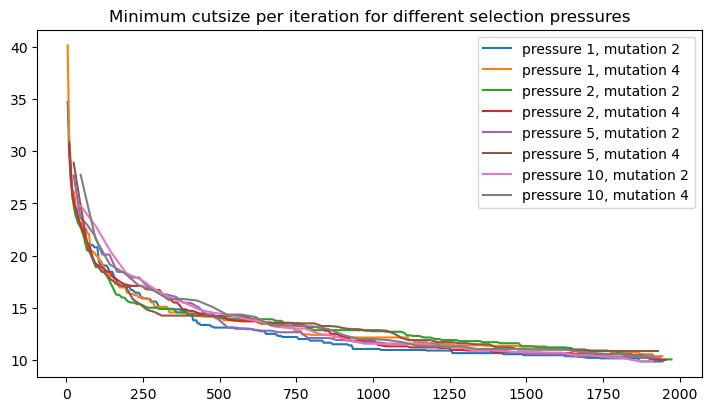

In [48]:
#Plot minimum cutsize per iteration
fig, ax = plt.subplots(figsize=(7, 4), layout='constrained')
ax.plot(avg_gen_dic[(1,2)]['fm'],avg_gen_dic[(1,2)]['cuts'], label='pressure 1, mutation 2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(1,4)]['fm'],avg_gen_dic[(1,4)]['cuts'], label='pressure 1, mutation 4')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(2,2)]['fm'],avg_gen_dic[(2,2)]['cuts'], label='pressure 2, mutation 2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(2,4)]['fm'],avg_gen_dic[(2,4)]['cuts'], label='pressure 2, mutation 4')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(5,2)]['fm'],avg_gen_dic[(5,2)]['cuts'], label='pressure 5, mutation 2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(5,4)]['fm'],avg_gen_dic[(5,4)]['cuts'], label='pressure 5, mutation 4')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(10,2)]['fm'],avg_gen_dic[(10,2)]['cuts'], label='pressure 10, mutation 2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(10,4)]['fm'],avg_gen_dic[(10,4)]['cuts'], label='pressure 10, mutation 4')  # Plot some data on the axes.
ax.legend()
ax.set_title("Minimum cutsize per iteration for different selection pressures")  # Add a legend.


Text(0.5, 1.0, 'Average cutsize per iteration for different selection pressures')

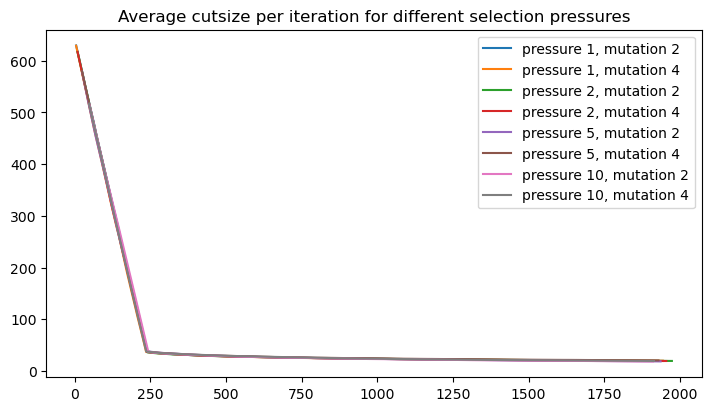

In [50]:
fig, ax = plt.subplots(figsize=(7, 4), layout='constrained')
ax.plot(avg_gen_dic[(1,2)]['fm'],avg_gen_dic[(1,2)]['avg'], label='pressure 1, mutation 2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(1,4)]['fm'],avg_gen_dic[(1,4)]['avg'], label='pressure 1, mutation 4')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(2,2)]['fm'],avg_gen_dic[(2,2)]['avg'], label='pressure 2, mutation 2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(2,4)]['fm'],avg_gen_dic[(2,4)]['avg'], label='pressure 2, mutation 4')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(5,2)]['fm'],avg_gen_dic[(5,2)]['avg'], label='pressure 5, mutation 2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(5,4)]['fm'],avg_gen_dic[(5,4)]['avg'], label='pressure 5, mutation 4')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(10,2)]['fm'],avg_gen_dic[(10,2)]['avg'], label='pressure 10, mutation 2')  # Plot some data on the axes.
ax.plot(avg_gen_dic[(10,4)]['fm'],avg_gen_dic[(10,4)]['avg'], label='pressure 10, mutation 4')  # Plot some data on the axes.
ax.legend()
ax.set_title("Average cutsize per iteration for different selection pressures")  # Add a legend.